# DNN Classifier

In [1]:
import pandas as pd

In [5]:
data = pd.read_csv(r"D:\Machine Learning Sentex\TensorFlow Tutorials\diabetes.csv")

In [6]:
data.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [7]:
data.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [8]:
cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

In [9]:
data[cols_to_norm]=data[cols_to_norm].apply(lambda x:(x - x.min())/(x.max() - x.min()))

In [10]:
data.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [40]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [41]:
num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dias_press = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')



In [42]:
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list('Group',['A','B','C','D'])

In [43]:
assigned_group_hash_table = tf.feature_column.categorical_column_with_hash_bucket('Group',hash_bucket_size=10)

In [44]:
import matplotlib.pyplot as plt

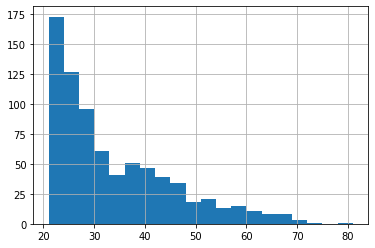

In [45]:
data['Age'].hist(bins=20)

In [46]:
age_bucket = tf.feature_column.bucketized_column(age,boundaries=[20,30,40,50,60,70,80])

In [47]:
feat_cols = [num_preg,plasma_gluc,dias_press,tricep,insulin,bmi,diabetes_pedigree,age_bucket]


In [48]:
#Train_test_split

In [49]:
x_data = data.drop('Class',axis=1)
x_data.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,C


In [50]:
labels = data['Class']
labels.tail()

763    0
764    0
765    0
766    1
767    0
Name: Class, dtype: int64

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
x_train,x_test,y_train,y_test = train_test_split(x_data,labels,test_size=0.3,random_state=101)

In [53]:
x_train

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Group
711,0.294118,0.633166,0.639344,0.272727,0.026005,0.441133,0.154142,40,D
58,0.000000,0.733668,0.672131,0.000000,0.000000,0.603577,0.727156,44,D
216,0.294118,0.547739,0.508197,0.414141,0.152482,0.533532,0.186166,25,B
168,0.235294,0.552764,0.540984,0.000000,0.000000,0.475410,0.167805,29,B
658,0.647059,0.638191,0.868852,0.000000,0.000000,0.581222,0.047822,51,A
...,...,...,...,...,...,...,...,...,...
75,0.058824,0.000000,0.393443,0.202020,0.000000,0.368107,0.026473,22,D
599,0.058824,0.547739,0.311475,0.181818,0.141844,0.344262,0.140478,26,A
575,0.058824,0.597990,0.360656,0.474747,0.074468,0.529061,0.086251,25,A
337,0.294118,0.577889,0.622951,0.000000,0.000000,0.464978,0.113151,44,A


In [54]:
x_test

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Group
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,47,C
748,0.176471,0.939698,0.573770,0.222222,0.236407,0.542474,0.140905,36,B
42,0.411765,0.532663,0.754098,0.181818,0.000000,0.338301,0.067037,48,A
485,0.000000,0.678392,0.557377,0.424242,0.295508,0.630402,0.122545,24,C
543,0.235294,0.422111,0.737705,0.232323,0.066194,0.588674,0.034586,25,C
...,...,...,...,...,...,...,...,...,...
188,0.470588,0.547739,0.622951,0.393939,0.134752,0.415797,0.239966,31,C
8,0.117647,0.989950,0.573770,0.454545,0.641844,0.454545,0.034159,53,D
645,0.117647,0.788945,0.606557,0.353535,0.520095,0.587183,0.023911,30,C
381,0.000000,0.527638,0.557377,0.222222,0.000000,0.298063,0.067464,22,A


In [55]:
input_func = tf.estimator.inputs.pandas_input_fn(x = x_train, y = y_train, batch_size=10, num_epochs=1000,shuffle=True)

In [56]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\pRoJyot\\AppData\\Local\\Temp\\tmp3kdbs3_u', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002359F13E548>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [57]:
model.train(input_fn=input_func, steps=1000)

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
Use `tf.cast` instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\pRoJyot\AppData\Local\Temp\tmp3kdbs3_u\model.ckpt.
INFO:tensorflow:loss = 6.931472, step = 1
INFO:tensor

In [58]:
#Eval the model

In [59]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x= x_test,y=y_test,
                    batch_size=10,num_epochs=1,shuffle=False)

In [60]:
results = model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-02-27T22:37:58Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\pRoJyot\AppData\Local\Temp\tmp3kdbs3_u\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-02-27-22:38:00
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.72727275, accuracy_baseline = 0.64935064, auc = 0.8007407, auc_precision_recall = 0.65532726, average_loss = 0.525606, global_step = 1000, label/mean = 0.35064936, loss = 5.0589576, precision = 0.6551724, prediction/mean = 0.3505521, recall = 0.4691358
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: C:\Users\pRoJyot\AppData\Local\Temp\tmp3kdbs3_u\model.ckpt-1000


In [61]:
results

{'accuracy': 0.72727275,
 'accuracy_baseline': 0.64935064,
 'auc': 0.8007407,
 'auc_precision_recall': 0.65532726,
 'average_loss': 0.525606,
 'label/mean': 0.35064936,
 'loss': 5.0589576,
 'precision': 0.6551724,
 'prediction/mean': 0.3505521,
 'recall': 0.4691358,
 'global_step': 1000}

In [64]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(x = x_test,batch_size=10,num_epochs=1,shuffle=False)

In [65]:
predictions = model.predict(pred_input_func)

In [66]:
predictions

<generator object Estimator.predict at 0x000002359EDA5548>

In [67]:
my_pred = list(predictions)
my_pred

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\pRoJyot\AppData\Local\Temp\tmp3kdbs3_u\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'logits': array([-0.09514034], dtype=float32),
  'logistic': array([0.47623286], dtype=float32),
  'probabilities': array([0.5237672 , 0.47623286], dtype=float32),
  'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'all_class_ids': array([0, 1]),
  'all_classes': array([b'0', b'1'], dtype=object)},
 {'logits': array([0.4582126], dtype=float32),
  'logistic': array([0.6125901], dtype=float32),
  'probabilities': array([0.38740996, 0.6125901 ], dtype=float32),
  'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object),
  'all_class_ids': array([0, 1]),
  'all_classes': array([b'0', b'1'], dtype=object)},
 {'logits': array([-0.5802654], dtype=float32),
  'logistic': array([0.35887152], dtype=float32),
  'probabilities': array([0.6411285 , 0.35887152], dtype=float32),
  'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'all_class_ids': array([0, 1]),
  'all_classes': array([b'0', b'1'], dtype=object)},

# Dense Neural N/W

In [69]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns = feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\pRoJyot\\AppData\\Local\\Temp\\tmps1m7scty', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000235A433FA88>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [70]:
dnn_model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\pRoJyot\AppData\Local\Temp\tmps1m7scty\model.ckpt.
INFO:tensorflow:loss = 7.1866226, step = 1
INFO:tensorflow:global_step/sec: 281.799
INFO:tensorflow:loss = 6.81083, step = 101 (0.355 sec)
INFO:tensorflow:global_step/sec: 260.552
INFO:tensorflow:loss = 6.038311, step = 201 (0.384 sec)
INFO:tensorflow:global_step/sec: 377.481
INFO:tensorflow:loss = 5.888039, step = 301 (0.269 sec)
INFO:tensorflow:global_step/sec: 378.797
INFO:tensorflow:loss = 2.9333367, step = 401 (0.264 sec)
INFO:tensorflow:global_step/sec: 367.419
INFO:tensorflow:loss = 4.041974, step = 501 (0.268 sec)
INFO:tensor

In [72]:

embedded_group_col = tf.feature_column.embedding_column(assigned_group, dimension=4)

In [74]:
feat_cols = [num_preg,plasma_gluc,dias_press,tricep,insulin,bmi,diabetes_pedigree,embedded_group_col,age_bucket]

In [75]:
input_func = tf.estimator.inputs.pandas_input_fn(x_train,y_train,batch_size=10,num_epochs=1000,shuffle=True)

In [80]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\pRoJyot\\AppData\\Local\\Temp\\tmp5iyekm8h', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002359F3B7F08>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [81]:
dnn_model.train(input_fn=input_func,steps = 1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\pRoJyot\AppData\Local\Temp\tmp5iyekm8h\model.ckpt.
INFO:tensorflow:loss = 6.629754, step = 1
INFO:tensorflow:global_step/sec: 228.366
INFO:tensorflow:loss = 5.8326726, step = 101 (0.442 sec)
INFO:tensorflow:global_step/sec: 352.227
INFO:tensorflow:loss = 5.6939435, step = 201 (0.280 sec)
INFO:tensorflow:global_step/sec: 367.414
INFO:tensorflow:loss = 4.167001, step = 301 (0.276 sec)
INFO:tensorflow:global_step/sec: 367.788
INFO:tensorflow:loss = 5.924348, step = 401 (0.272 sec)
INFO:tensorflow:global_step/sec: 367.645
INFO:tensorflow:loss = 4.403509, step = 501 (0.268 sec)
INFO:tensorflow:global_step/sec: 347.071
INFO:tensorflow:loss = 4.2549253, step = 601 (0.292 sec)
INFO:tensorflow:global_step/se

In [82]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x = x_test,y = y_test,batch_size=10,num_epochs=1,shuffle=False)

In [83]:
dnn_model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-02-27T22:58:26Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\pRoJyot\AppData\Local\Temp\tmp5iyekm8h\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-02-27-22:58:27
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.75757575, accuracy_baseline = 0.64935064, auc = 0.8179012, auc_precision_recall = 0.6855303, average_loss = 0.50829214, global_step = 1000, label/mean = 0.35064936, loss = 4.892312, precision = 0.66233766, prediction/mean = 0.36369014, recall = 0.6296296
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: C:\Users\pRoJyot\AppData\Local\Temp\tmp5iyekm8h\model.ckpt-1000


{'accuracy': 0.75757575,
 'accuracy_baseline': 0.64935064,
 'auc': 0.8179012,
 'auc_precision_recall': 0.6855303,
 'average_loss': 0.50829214,
 'label/mean': 0.35064936,
 'loss': 4.892312,
 'precision': 0.66233766,
 'prediction/mean': 0.36369014,
 'recall': 0.6296296,
 'global_step': 1000}